In [1]:
'''LETS IMPORT THE DEPENDENCIES FOR TRAINING'''

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPool2D, Flatten, Activation
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
'''IMPORTING THE DATASET'''

from keras.datasets import mnist

In [3]:
'''OUR DATASET IS ALREADY IN READY MADE FORM SO AM JUST ASSIGNING TO MY VARIABLES'''
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
'''RESHAPING TO REQUIRED FROM HERE -1 TAKE THE TOTAL INPUT OF OUR DATA AND THE 1 REPRESENT WE ARE TAKING IT IN GREY SCALE'''
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

## our y_train ,y_test both has totally 10 catagories so lets catagories it

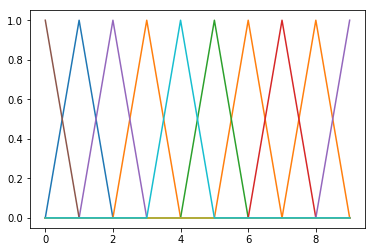

In [22]:
plt.plot(y_trainCat[:10])

In [5]:

y_trainCat = to_categorical(y_train)
y_testCat = to_categorical(y_test)

In [6]:
'''lets convert our x data-points to minimal value to reduce computation time'''
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/ 255.0

In [7]:
'''CREATING OUR CNN MODEL WITH ONLY 10 OUTPUT LAYER HENCE WE HAVE 10 VALUES IN OUR Y'''
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))


model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))



In [8]:
'''COMPILE THE MODEL'''

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [9]:
'''NO ERROR FOUND SO ITS GOOD TO TRAIN'''

model.fit(X_train, y_trainCat, batch_size=1000, epochs=50, verbose=1, validation_split=0.4)


Train on 36000 samples, validate on 24000 samples
Epoch 1/50
36000/36000 [==============================] - 94s 3ms/step - loss: 1.4528 - accuracy: 0.5923 - val_loss: 0.4897 - val_accuracy: 0.8561
Epoch 2/50
36000/36000 [==============================] - 77s 2ms/step - loss: 0.3410 - accuracy: 0.9000 - val_loss: 0.2412 - val_accuracy: 0.9267
Epoch 3/50
36000/36000 [==============================] - 80s 2ms/step - loss: 0.2067 - accuracy: 0.9391 - val_loss: 0.1739 - val_accuracy: 0.9473
Epoch 4/50
36000/36000 [==============================] - 74s 2ms/step - loss: 0.1594 - accuracy: 0.9534 - val_loss: 0.1417 - val_accuracy: 0.9572
Epoch 5/50
36000/36000 [==============================] - 69s 2ms/step - loss: 0.1329 - accuracy: 0.9610 - val_loss: 0.1259 - val_accuracy: 0.9622
Epoch 6/50
36000/36000 [==============================] - 71s 2ms/step - loss: 0.1192 - accuracy: 0.9646 - val_loss: 0.1171 - val_accuracy: 0.9650
Epoch 7/50
36000/36000 [==============================] - 74s 2ms/s

In [10]:
'''EVALUATING'''
model.evaluate(X_test, y_testCat)

10000/10000 [==============================] - 7s 713us/step


[0.055275071661794024, 0.9858999848365784]

### our model now has good accuracy b4 further doing anything lets save it first in h5 file format

In [11]:
model.save('model_to_find_handWritten_numbers.h5')

## OUR MODEL IS NOW TRAINED AND HAS SOME WHAT GOOD ACCURACY
## SO LETS TRY TO CREATE A GUI BY USING THE MODEL

In [12]:
'''IMPORTING THE DEPENDENCIES HERE AM USING TKINKER 
  FOR CALCULATION NUMPY AND MATH TO READ WRITING IMPORTING IMAGE'''

from numpy import argmax
from tkinter import *
import tkinter as tk
import math
from PIL import Image, ImageDraw

In [23]:
'''CREATING A CANVAS '''
white = (200, 25, 255)
black = (255, 0, 0)
window = Tk()
 
window.title("Handwriting Predector")
 
window.geometry('700x700')
# heading 
lbl = Label(window, text="Write number with your mouse in the Blue square",font=('Arial Bold',18))
 
lbl.grid(column=3, row=0)

lbl1 = Label(window, text="PREDICTION",font=('Arial Bold',12))
 
lbl1.grid(column=5, row=1)

# canvas to write numbers and creating to add the written value of coordinates into lists with
# respect to their coordinate axis
canvas_width = 400
canvas_height = 400
image1 = Image.new("RGB", (canvas_width, canvas_height),white)
draw = ImageDraw.Draw(image1)
counter=0
xpoints=[]
ypoints=[]
x2points=[]
y2points=[]
global predictions
predictions = []
number1 = []
digits=0

# function to read the mouse drawing
def paint( event ):
    x1, y1 = ( event.x - 4 ), ( event.y - 5 )
    x2, y2 = ( event.x + 5 ), ( event.y + 5 )
    w.create_oval( x1, y1, x2, y2, fill = 'red' )
    xpoints.append(x1)
    ypoints.append(y1)
    x2points.append(x2) 
    y2points.append(y2)    

# function to generate image with respect to writing
def imagen ():
    global counter
    global xpoints
    global ypoints    
    global x2points
    global y2points
    counter=counter+1

    image1 = Image.new("RGB", (canvas_width, canvas_height),black)
    draw = ImageDraw.Draw(image1) 

    elementos=len(xpoints)
    
    

    for p in range (elementos):
        x=xpoints[p]
        y=ypoints[p]
        x2=x2points[p]
        y2=y2points[p] 
        draw.ellipse((x,y,x2,y2),'white')
        w.create_oval( x-5, y-5, x2+5, y2+5,outline='yellow', fill = 'yellow' )
    
    # lets predict the written number using our model b4 that try to reshape the 
    #   the image so that model can predict so i did the same x point operation 
    size=(28,28)
    image1 = image1.resize(size)

    
    image1 = image1.convert('L')
    image1 = np.array(image1)
    image1 = image1.reshape(-1, 28, 28, 1)
    image1 = image1.astype('float32')
    image1 /= 255.0

    
    predictions.append(argmax(model.predict(image1)))
    lbl2 = Label(window, text=predictions[counter-1],font=('Arial Bold',30))
    lbl2.grid(column=5, row=2)
    

    xpoints=[]
    ypoints=[]
    x2points=[]
    y2points=[] 

## window to get input
w = Canvas(window, 
           width=canvas_width, 
           height=canvas_height,bg='yellow')
w.grid(column=3,row=2)

def delete ():
    global counter
    counter = counter-1
    del predictions[counter]
    w1 = Canvas(window, 
           width=27, 
           height=35,bg='yellow')
    w1.grid(column=5,row=2)
    
def reset():
    global predictions
    global counter
    predictions=[]
    counter=0
    w1 = Canvas(window, 
           width=27, 
           height=35,bg='yellow')
    w1.grid(column=5,row=2)
    
w1 = Canvas(window, width=27, height=35,bg='yellow')
w1.grid(column=5,row=2)

# w1 = Canvas(window, width=27, height=35,bg='royal blue')
# w1.grid(column=8,row=2)

w.bind( "<B1-Motion>", paint )
button = tk.Button(window, text='Predict image', width=35, command=imagen)
button.grid(column=3,row=3)

# button1 = tk.Button(window, text='delete', width=35, command=delete)
# button1.grid(column=3,row=4)

button3 = tk.Button(window, text='Reset', width=35, command=reset)
button3.grid(column=3,row=5)


window.mainloop()